<a href="https://colab.research.google.com/github/dondees/Dev_Meetings_DS/blob/master/Copy_of_Copy_of_Copy_of_2_Dev_Meeting_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DevMeeting – Data Science
## 2. Badania eksploracyjne (ang. EDA) i wizualizacja danych

Zadaniem badań eksploracyjnych w kontekście data science jest:
- uzyskanie wartościowych informacji biznesowych,
- lepszym poznaniu zbioru danych, który jest analizowany,
- ułatwienie doboru właściwego algorytmu.

## 2.1 Wczytanie danych i manualny przegląd

In [0]:
import pandas as pd

In [0]:
titanic_df = pd.read_csv('https://dzkb.github.io/devmeeting-data-science/data/titanic.csv')

In [0]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [0]:
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## 2.2 Usunięcie niepotrzebnych kolumn 

In [0]:
titanic_df.drop(['Cabin', 'PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

axis = 1 kolumny lub axis = 0 wiersze, przy duzej ilosci danych inplace = true

In [0]:
titanic_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [0]:
titanic_df.rename(columns={'Pclass': 'PassengerClass', 'SibSp': 'SiblingsSpuseOnBoard', 'Parch': 'ParentsChildrenOnBoard'}, inplace=True)

In [0]:
titanic_df

,Survived,PassengerClass,Sex,Age,SiblingsSpuseOnBoard,ParentsChildrenOnBoard,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


## 2.3 Usunięcie duplikatów

In [0]:
titanic_df.shape

(891, 8)

liczba wierszy, liczba kolumn

In [0]:
titanic_duplicated_rows = titanic_df[titanic_df.duplicated()]

In [0]:
titanic_duplicated_rows.shape

(111, 8)

111 duplikatow

In [0]:
titanic_df_droped_duplicates = titanic_df.drop_duplicates()

In [0]:
titanic_df_droped_duplicates

,Survived,PassengerClass,Sex,Age,SiblingsSpuseOnBoard,ParentsChildrenOnBoard,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


## 2.4 Obsługa brakujących wartości



In [0]:
titanic_df_droped_duplicates.isnull().sum()

Survived                    0
PassengerClass              0
Sex                         0
Age                       104
SiblingsSpuseOnBoard        0
ParentsChildrenOnBoard      0
Fare                        0
Embarked                    2
dtype: int64

In [0]:
# Wariant 1. - zastąpić brakujące wartości wartościami średnimi danej kolumny
mean_age_value = int(titanic_df_droped_duplicates['Age'].mean())

titanic_avg_filled = titanic_df_droped_duplicates

titanic_avg_filled['Age'] = titanic_df_droped_duplicates['Age'].fillna(mean_age_value)

titanic_avg_filled.isnull().sum()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Survived                  0
PassengerClass            0
Sex                       0
Age                       0
SiblingsSpuseOnBoard      0
ParentsChildrenOnBoard    0
Fare                      0
Embarked                  2
dtype: int64

In [0]:
# Wariant 2. - Usunąć wiersze, z brakującymi danymi
titanic_without_none_values = titanic_df_droped_duplicates.dropna()
titanic_without_none_values.isnull().sum()

Survived                  0
PassengerClass            0
Sex                       0
Age                       0
SiblingsSpuseOnBoard      0
ParentsChildrenOnBoard    0
Fare                      0
Embarked                  0
dtype: int64

## 2.5 Radzenie sobie z anomaliami w danych

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(color_codes=True)

#### Jak czytać wykresy pudełkowe?
<img src="https://miro.medium.com/max/16200/1*NRlqiZGQdsIyAu0KzP7LaQ.png" alt="boxplot" width="400" height="400"/>

[źródło](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51)

IQR roznica pomiedzy kwartylami (Q3-Q1)


wyszukiwanie anomalii

w prawo 
Q3 + 1,5 * IQR = 9+9=18

w lewo 
Q1 -1,5 * IQR = 3 - 9 = -6

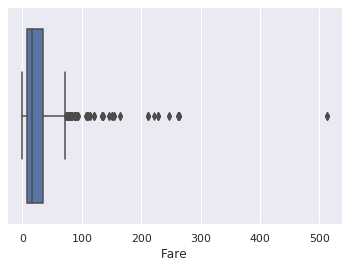

In [0]:
sns.boxplot(x=titanic_without_none_values['Fare'])

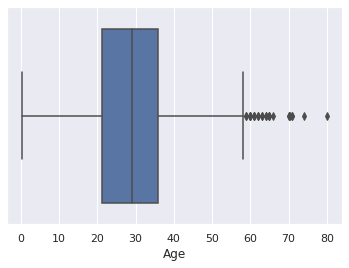

In [0]:
sns.boxplot(x=titanic_without_none_values['Age'])

In [0]:
q1 = titanic_without_none_values.quantile(0.25)
q3 = titanic_without_none_values.quantile(0.75)

iqr = q3 - q1

In [0]:
outliers_filter = (titanic_without_none_values < (q1 - 3.0*iqr)) | (titanic_without_none_values > (q3 + 3.0*iqr))
outliers_filter

,Age,Embarked,Fare,ParentsChildrenOnBoard,PassengerClass,Sex,SiblingsSpuseOnBoard,Survived
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
885,False,False,False,True,False,False,False,False
887,False,False,False,False,False,False,False,False
888,False,False,False,False,False,False,False,False
889,False,False,False,False,False,False,False,False


zwiekszamy kwartyl do 3, zeby nie odrzucac wieku= 80

In [0]:
no_outlier_filter = ~(outliers_filter).any(axis=1)
no_outlier_filter

0       True
1       True
2       True
3       True
4       True
       ...  
885    False
887     True
888     True
889     True
890     True
Length: 778, dtype: bool

In [0]:
no_outlier_filter.value_counts()

True     720
False     58
dtype: int64

In [0]:
titanic_outlayers_removed = titanic_without_none_values[no_outlier_filter]
titanic_outlayers_removed.shape

(720, 8)

In [0]:
titanic_without_none_values.loc[885]

Survived                       0
PassengerClass                 3
Sex                       female
Age                           39
SiblingsSpuseOnBoard           0
ParentsChildrenOnBoard         5
Fare                      29.125
Embarked                       Q
Name: 885, dtype: object

In [0]:
titanic_outlayers_removed['ParentsChildrenOnBoard'].max()

4

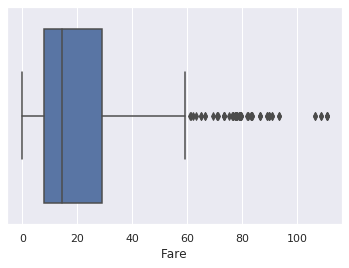

In [0]:
sns.boxplot(x=titanic_outlayers_removed['Fare'])

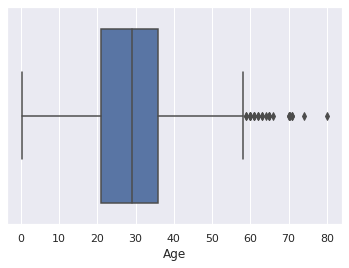

In [0]:
sns.boxplot(x=titanic_outlayers_removed['Age'])

## 2.6 Analiza i wizualizacja cech 

### 2.6.1 Histogram

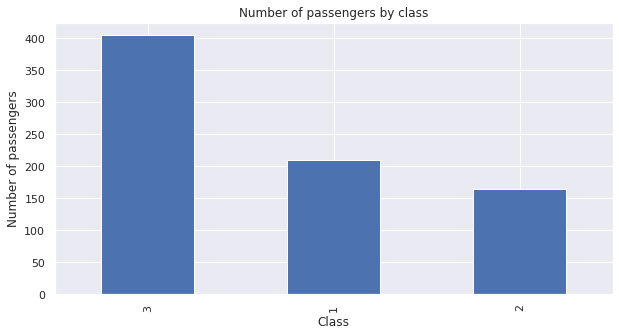

In [0]:
titanic_without_none_values["PassengerClass"].value_counts().plot(kind="bar", figsize=(10,5))
plt.title("Number of passengers by class")
plt.ylabel("Number of passengers")
plt.xlabel("Class");

### 2.6.2 Heat map

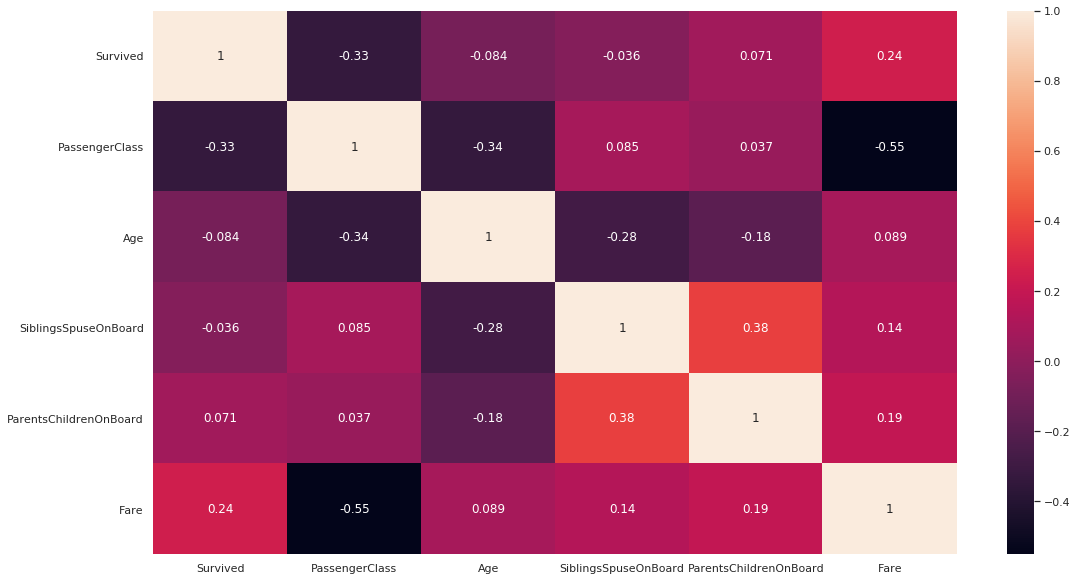

In [0]:
plt.figure(figsize=(18,10))
correlatons = titanic_without_none_values.corr()
sns.heatmap(correlatons, annot=True)

# Zadania do wykonania

1. Wczytaj zbiór Wine Quality Data dla win czerwonych i dokonaj preprocessingu:
  *   usuń niepotrzebne kolumny, jeśli trzeba
  *   wypełnij puste wartości jeśli istnieją
2. Co można zrobić, by poprawić jakość wina?
  *   które składniki są najbardziej powiązane z jakością wina?
  *   czy istnieją jakieś anomalie? Jeśli tak, to miały jakiś wpływ na jakość wina?
  *   czy istnieją jakieś zależności między składnikami?
  *   na podstawie powyższych analiz, spróbuj podać przepis na udane wino :) Uargumentuj swoją propozycję

In [0]:
wine_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')

In [0]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [0]:
wine_df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [0]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [0]:
wine_df.shape

(1599, 12)

In [0]:
wine_duplicated_rows = wine_df[wine_df.duplicated()]

In [0]:
wine_df_droped_duplicates = wine_df.drop_duplicates()
wine_df_droped_duplicates

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Brakujące wartości


In [0]:
wine_df_droped_duplicates.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(color_codes=True)

In [0]:
sns.boxplot(x=wine_df_droped_duplicates[wine_df_droped_duplicates]

SyntaxError: ignored

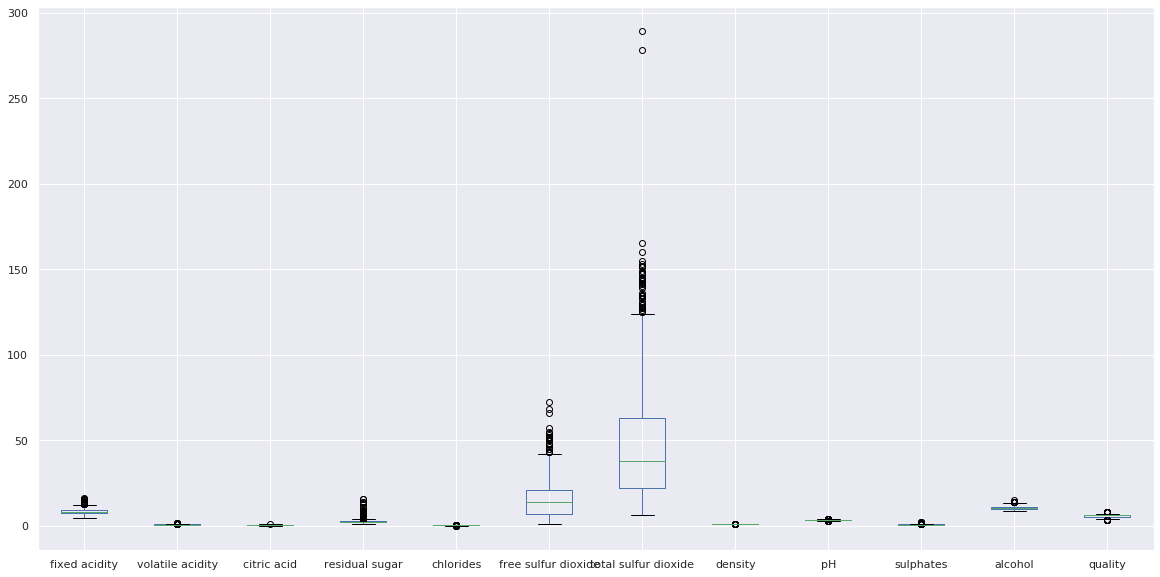

In [0]:
plt.figure(figsize= (20,10))
wine_df_droped_duplicates.boxplot()

In [0]:
q1 = wine_df_droped_duplicates.quantile(0.25)
q3 = wine_df_droped_duplicates.quantile(0.75)

iqr = q3 - q1

In [0]:
outliers_filter = (wine_df_droped_duplicates < (q1 - 3*iqr)) | (wine_df_droped_duplicates > (q3 + 3*iqr))
outliers_filter

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,False,False,False,False,False,False,False,False,False,False,False,False
1594,False,False,False,False,False,False,False,False,False,False,False,False
1595,False,False,False,False,False,False,False,False,False,False,False,False
1597,False,False,False,False,False,False,False,False,False,False,False,False


In [0]:
no_outlier_filter = ~(outliers_filter).any(axis=1)
no_outlier_filter

0       True
1       True
2       True
3       True
5       True
        ... 
1593    True
1594    True
1595    True
1597    True
1598    True
Length: 1359, dtype: bool

In [0]:
no_outlier_filter.value_counts()

True     1220
False     139
dtype: int64

In [0]:
wine_outlayers_removed =wine_df_droped_duplicates[no_outlier_filter]
wine_outlayers_removed.shape

(1220, 12)

In [0]:
wine_outlayers_removed['total sulfur dioxide'].max()

165.0

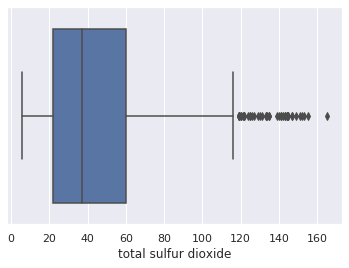

In [0]:
sns.boxplot(x=wine_outlayers_removed['total sulfur dioxide'])

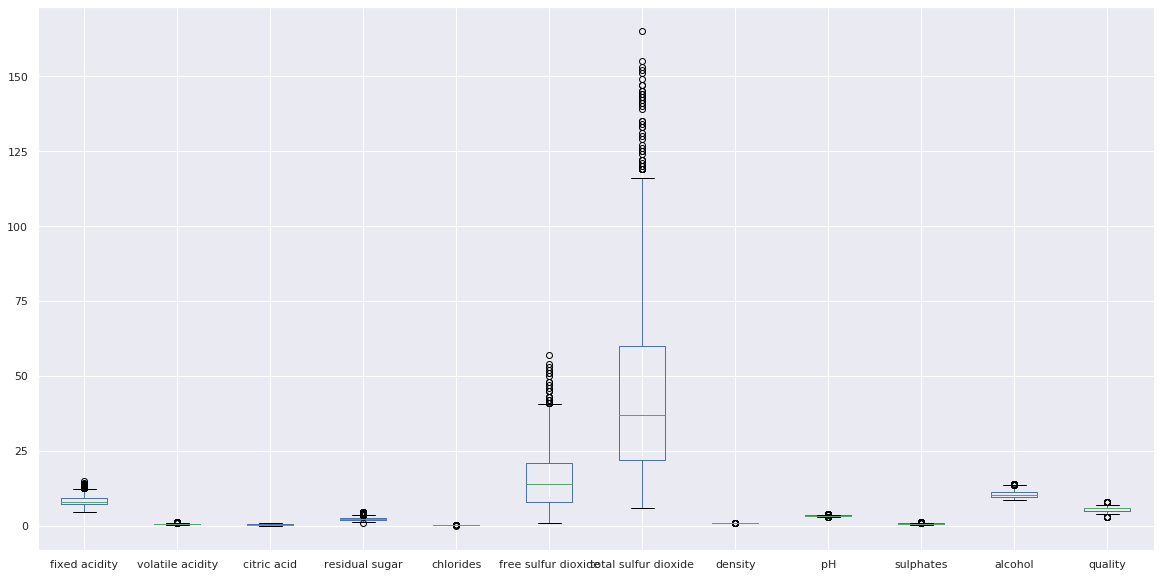

In [0]:
plt.figure(figsize= (20,10))
wine_outlayers_removed.boxplot()


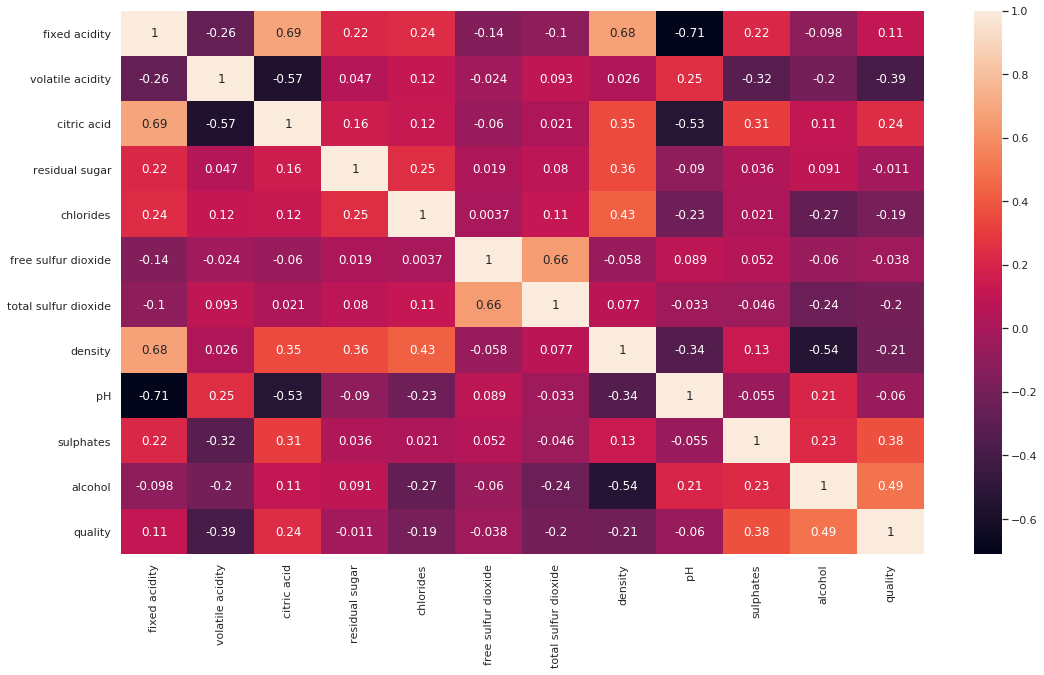

In [0]:
plt.figure(figsize=(18,10))
correlatons = wine_outlayers_removed.corr()
sns.heatmap(correlatons, annot=True)